In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl
import matplotlib
matplotlib.rcParams['font.size'] = 12

import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
#initialize star properties
toiid = 837
star = cr.Star(toiid=toiid)

# literature data

In [3]:
_ = star.query_tic_catalog(return_nearest_xmatch=True)

Querying TIC catalog for ra,dec=(157.037 -64.5052) within 3.0 arcsec.

There are 2 TIC stars within 3.0 arcsec


In [4]:
_ = star.query_gaia_dr2_catalog(return_nearest_xmatch=True)

Querying Gaia DR2 catalog for ra,dec=(157.037 -64.5052) within 3.0 arcsec.

There are 2 gaia sources within 3.0 arcsec.


In [ ]:
vizier_tables = star.query_vizier()
vizier_tables #[0]

In [6]:
star.query_vizier_param("RV")

Found 2 references with RV


{'I/345/gaia2': 17.45, 'J/A+A/633/A99/members': 17.4453086095358}

In [8]:
mast_table = star.query_mast()
mast_table.tail(3)

Searching MAST: (157.037 -64.5052) with radius=3.0 arcsec
Available data: ['TESS/TESS', 'HLSP/TESS'] in ['Optical']


,intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,...,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,distance
8,science,HLSP,ELEANOR,Photometer,TESS,TESS,Optical,postcard-s0010-3-1-cal-1490-1726,NaN,hlsp_eleanor_tess_ffi_postcard-s0010-3-1-cal-1...,...,NaN,10,POLYGON ICRS 158.18222200 -64.69304500 157.153...,NaN,mast:HLSP/eleanor/postcards/s0010/3-1/hlsp_ele...,PUBLIC,False,NaN,18003873233,0.0
9,science,HLSP,ELEANOR,Photometer,TESS,TESS,Optical,postcard-s0011-3-2-cal-1392-1834,NaN,hlsp_eleanor_tess_ffi_postcard-s0011-3-2-cal-1...,...,NaN,11,POLYGON ICRS 158.47029600 -64.75712600 157.138...,NaN,mast:HLSP/eleanor/postcards/s0011/3-2/hlsp_ele...,PUBLIC,False,NaN,18003886916,0.0
10,science,HLSP,ELEANOR,Photometer,TESS,TESS,Optical,postcard-s0011-3-2-cal-1392-1888,NaN,hlsp_eleanor_tess_ffi_postcard-s0011-3-2-cal-1...,...,NaN,11,POLYGON ICRS 157.77476700 -64.85880100 156.433...,NaN,mast:HLSP/eleanor/postcards/s0011/3-2/hlsp_ele...,PUBLIC,False,NaN,18003883347,0.0


In [9]:
harps_rv_table = star.query_harps_rv()
harps_rv_table

Loaded: /home/jp/github/research/project/chronos/chronos/../data/HARPS_RVBank_table.csv

Nearest HARPS obj is
HD92536: ra,dec=(10:39:22.8311,-64:06:42.434) @ d=4604.91



In [10]:
specs_obs_table = star.query_specs_from_tfop()
specs_obs_table

Saved: /home/jp/github/research/project/chronos/chronos/../data/tfop_sg2_spec_table.csv
There are 2 spectra in https://exofop.ipac.caltech.edu/tess/target.php?id=460205581



,TIC ID,TIC,TOI,Telescope,Instrument,Spectral resolution,Wavelength coverage,SNR/resolution,SNR wavelength,Appropriate to PRV,Obs date,User,Group,Tag,Notes
3191,460205581,NaN,NaN,SMARTS (1.5 m),CHIRON,80000.0,4500 to 8900 Angstroms,15.4,5500 angstroms,N,2020-01-28,quinn,tfopwg,16758,NaN
3192,460205581,NaN,NaN,SMARTS (1.5 m),CHIRON,80000.0,4500 to 8900 Angstroms,41.7,5500 angstroms,N,2020-02-05,quinn,tfopwg,16759,NaN


# stellar characterization

In [7]:
star.query_vizier_param("Teff")

Found 4 references with Teff


{'I/345/gaia2': 5768.13,
 'V/136/tycall': 5432.0,
 'J/AJ/158/93/table2': 5747,
 'J/MNRAS/471/770/table1': 5824}

In [9]:
#from tic and tycho-gaia
star.query_vizier_param("logg")

Found 2 references with logg


{'J/AJ/156/102/table9': 4.53694, 'J/MNRAS/471/770/table1': 4.475}

In [17]:
star.query_vizier_param("feh")

Found 0 references with feh


{}

In [11]:
star.tic_params.MH, star.tic_params.e_MH

(nan, nan)

In [11]:
star.get_iso_params(
#                     feh=(,),
#                     logg=(,),
                    add_jhk=False
                    )

Gaia and TIC catalog cross-match succeeded.


{'teff': [6104.0, 124.263],
 'G': [10.3559618, 0.01],
 'bp': [10.6950684, 0.01],
 'rp': [9.887476, 0.01],
 'parallax': [6.989271021434323, 0.1024968101333305]}

In [12]:
#note that adding stellar rotation period would improve age estimate
sd = star.run_stardate()

Gaia and TIC catalog cross-match succeeded.
Input parameters:
{'Av': [2.1429268181324006, 0.01],
 'G': [10.3559618, 0.01],
 'bp': [10.6950684, 0.01],
 'parallax': [6.989271021434323, 0.1024968101333305],
 'rp': [9.887476, 0.01],
 'teff': [6104.0, 124.263]}
Init parameters:
{'Av': 0.0045,
 'EEP': 329.58,
 '[Fe/H]': -0.0478,
 'ln(Distance)': 5.560681631015528,
 'log10(Age [yr])': 9.5596}


100%|██████████| 10000/10000 [00:55<00:00, 180.38it/s]

nsteps 10000 burnin 0


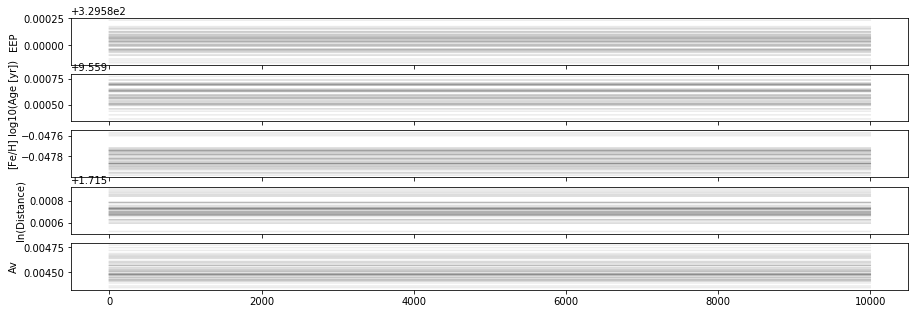

In [13]:
fig = star.plot_flatchain()

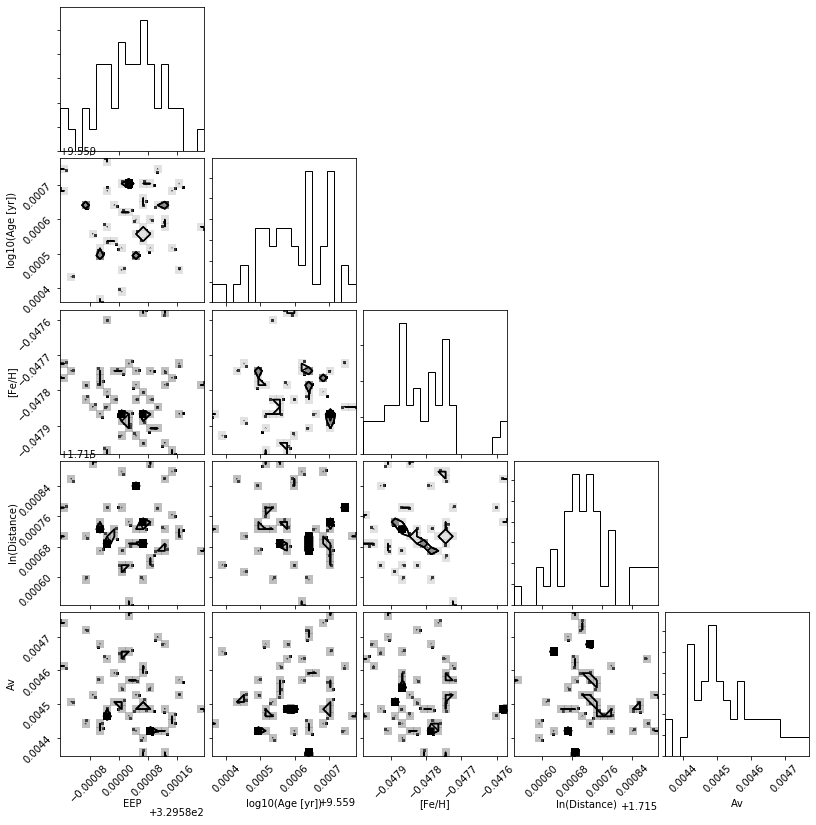

In [14]:
fig = star.plot_corner()

# lightcurve analysis

## cdips lc

In [12]:
star.cdips = cr.CDIPS(toiid=star.toiid)

Available sectors: [10 11]
CDIPS lc may be available for sectors [10 11]
Using sector=10.
Querying Gaia DR2 catalog for ra,dec=(157.037 -64.5052) within 2.0 arcsec.

Filename: /home/jp/.astropy/cache/download/py3/7aff9e7f6bb9289311073789ba4febd0
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     103   ()      
  1                1 BinTableHDU    113   1041R x 34C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 1A, 1A, 1A, 48A, D, D, D, D, J, D, D, D, D, D, D, D, D]   
None
HIERARCH Gaia-ID =  5251470948229949568 / GaiaDR2 source_id. ->lum_val from sameHIERARCH Parallax[mas] = 6.9893                                                 HIERARCH PM_RA[mas/yr] = -18.0165421964                                         HIERARCH PM_Dec[mas/year] = 11.3067746831                                       HIERARCH Ref_Epoch[yr] = 2015.5                                                 HIERARCH AstExcNoise[mas] = 0.0                                      

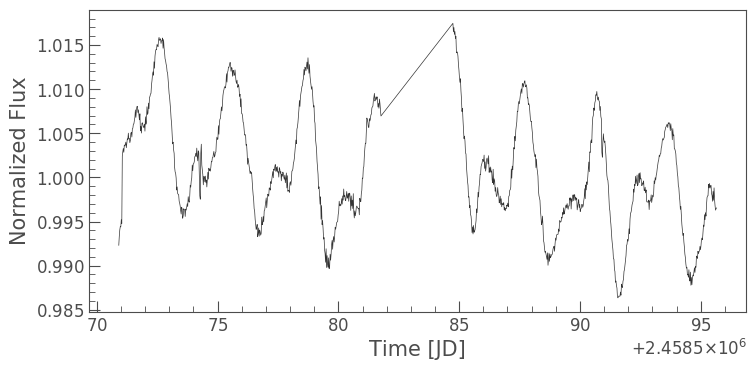

In [5]:
star.cdips.lc.plot()

In [26]:
#transit duration in ncadences
t14_ncadences = int(round(star.cdips.toi_duration*cr.u.hour.to(cr.u.minute)/30))
t14_ncadences

4

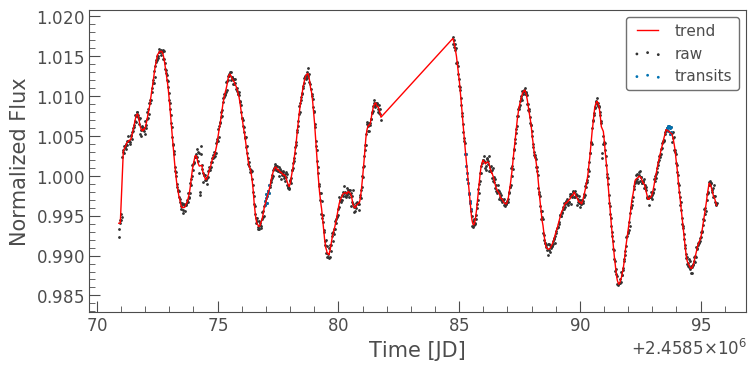

In [34]:
lc_raw = star.cdips.lc
tmask = cr.get_transit_mask(lc_raw, 
                            period=star.toi_period,
                            epoch=star.toi_epoch-cr.TESS_TIME_OFFSET,
                            duration_hours=star.toi_duration)
lc = lc_raw[~tmask]
ax = lc_raw.scatter(label='raw')
lc_raw[tmask].scatter(ax=ax, label='transits')
flat, trend = lc.flatten(window_length=1+t14_ncadences*3, return_trend=True)
trend.plot(ax=ax, c='r', lw=1, label='trend')

(-0.05, 0.05)

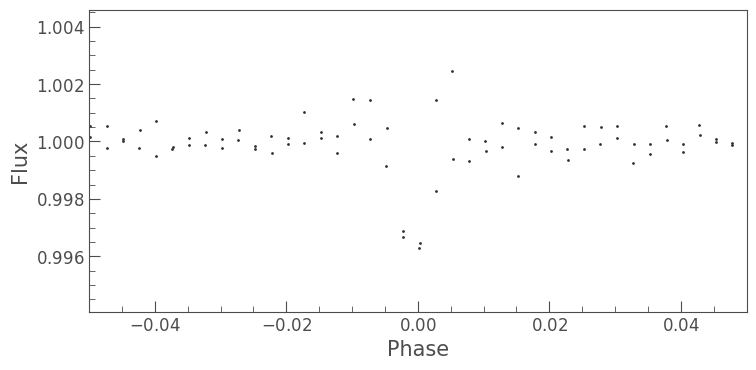

In [37]:
ax = flat.fold(period=star.toi_period, t0=star.toi_epoch).scatter()
ax.set_xlim(-0.05,0.05)

## long cadence

## short cadence

In [39]:
#initialize lightcurve functionalities
star.sc = cr.ShortCadence(toiid=837)

Available sectors: [10, 11]
Using sector=10.


In [40]:
all_sectors = star.sc.get_all_sectors()
all_sectors

[10, 11]

Searching lightcurvefile for TIC 460205581 (sector 10)
Found 1 lightcurves


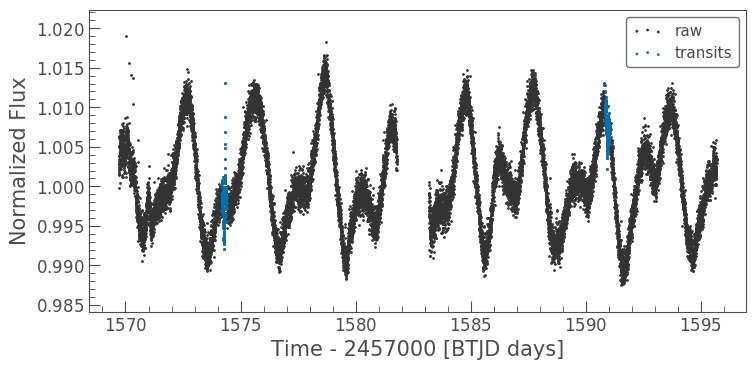

In [41]:
lc1 = star.sc.get_lc(sector=all_sectors[0])
tmask1 = cr.get_transit_mask(lc1, 
                            period=star.sc.toi_period,
                            epoch=star.sc.toi_epoch-cr.TESS_TIME_OFFSET,
                            duration_hours=star.sc.toi_duration)
ax=lc1.scatter(label='raw')
lc1[tmask1].scatter(label='transits', ax=ax)

Searching lightcurvefile for TIC 460205581 (sector 11)
Found 1 lightcurves


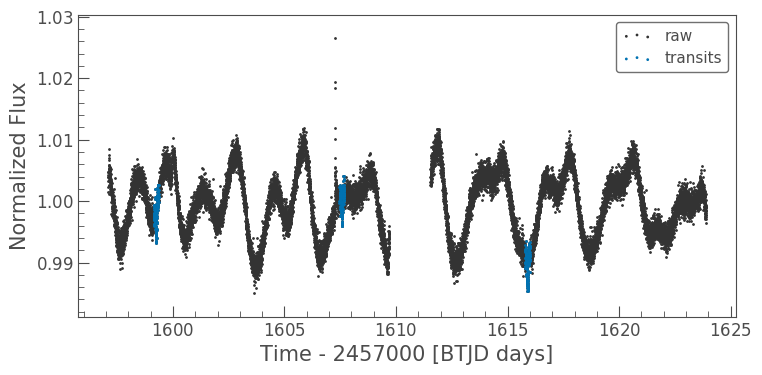

In [42]:
lc2 = star.sc.get_lc(sector=all_sectors[1])
tmask2 = cr.get_transit_mask(lc2, 
                            period=star.sc.toi_period,
                            epoch=star.sc.toi_epoch-cr.TESS_TIME_OFFSET,
                            duration_hours=star.sc.toi_duration)
ax=lc2.scatter(label='raw')
lc2[tmask2].scatter(label='transits', ax=ax)

### merging multi-sector lc

In [43]:
#with masked transits
lc = lc1[~tmask1].append(lc2[~tmask2])
#without
lc_raw = lc1.append(lc2)

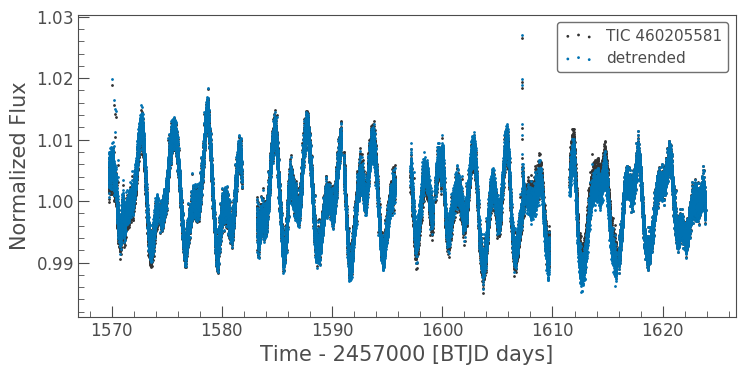

In [35]:
lc.detrend = lambda : cr.detrend(lc)
ax = lc.scatter(label='orig')
#lc.detrend().scatter(label='detrended', ax=ax)

P=2.99+/-0.06 d


(2.9879372234468344, 0.05630112854361899)

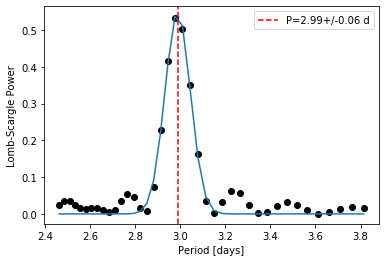

In [29]:
prot, prot_err = cr.get_rotation_period(lc.time, lc.flux, npoints=20)
prot, prot_err

P=3.25+/-0.00 d


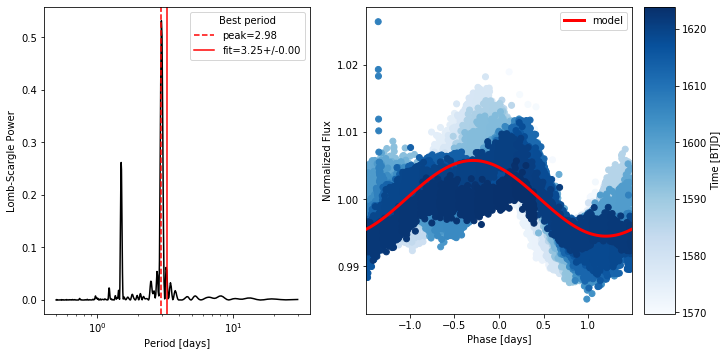

In [31]:
fig = cr.plot_rotation_period(lc.time, lc.flux)

### age estimates

In [10]:
#using iso+gyro
sd = star.run_stardate(prot=(prot,prot_err))

Gaia and TIC catalog cross-match succeeded.
Input parameters:
{'Av': [2.1429268181324006, 0.01],
 'G': [10.3559618, 0.01],
 'bp': [10.6950684, 0.01],
 'parallax': [6.989271021434323, 0.1024968101333305],
 'rp': [9.887476, 0.01],
 'teff': [6104.0, 124.263]}
Init parameters:
{'Av': 0.0045,
 'EEP': 329.58,
 '[Fe/H]': -0.0478,
 'ln(Distance)': 5.560681631015528,
 'log10(Age [yr])': 9.5596}


100%|██████████| 10000/10000 [00:53<00:00, 188.52it/s]

nsteps 10000 burnin 0


Estimating age from isochrones

iso+gyro age = 3627.41 + 0.97 - 0.97 Myr


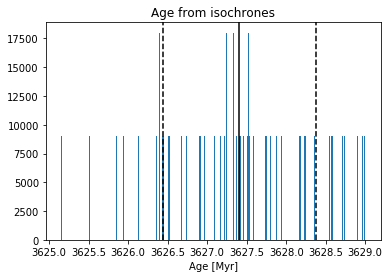

In [13]:
#get age results
age,age_plus,age_minus,samples = star.get_age(method='isochrones', 
                                              prot=(prot,prot_err), 
                                              return_samples=True,
                                              plot=True)

Estimating age from rotation period

Gaia and TIC catalog cross-match succeeded.
Estimating age using gyrochronology

gyro age = 170.31 + 172.08 - 48.53 Myr using rotation period 2.99+/-0.12d


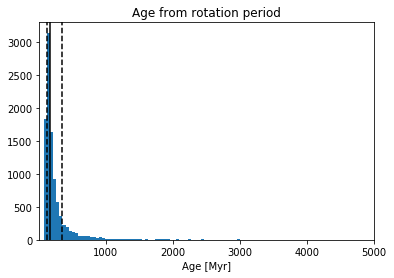

In [14]:
#get age results
age,age_plus,age_minus,samples = star.get_age(method='prot', 
                                              prot=(prot,prot_err), 
                                              return_samples=True,
                                              plot=True)

Estimating age using rotation amplitude

More than 30% of derived ages are outside (0.01,4) Gyr
gyro age = 371.13 + 818.68 - 304.30 Myr using rotation amplitude 1.72+/-0.40%


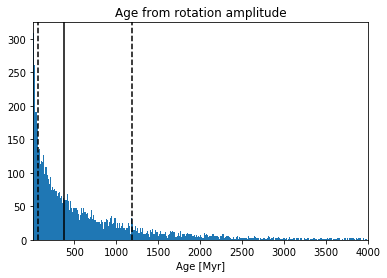

In [16]:
#get age results
age,age_plus,age_minus,samples = star.get_age(method='amp', 
                                              lc=lc,
                                              return_samples=True,
                                              plot=True)